# FACEMASK DETECTION 

` Detect people wearing a facemask`

### Importing the libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2      
import imghdr              # check the extensiontype
import PIL.Image as Image  # Img visualisation
import pathlib             # change str to dir
from tensorflow import keras as tf
#from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator

## PART 1: Data Exploratory

In [103]:
img_base_dir= 'mask_unmasked_dataset'
img_dir_train = 'mask_unmasked_dataset/training_set' 
img_dir_test = 'mask_unmasked_dataset/test_set' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [3]:
os.listdir(img_dir_train)

['facemasked', 'no_facemask']

In [4]:
os.listdir(os.path.join(img_dir_train,'no_facemask', ))

['004-alexander-khimushin.jpg',
 '007-alexander-khimushin.jpg',
 '1-56.jpg',
 '1000_F_514736605_5IdOFcRPLe0TM2IVo8jOVa2WRnoaCNpB.jpg',
 '2dc6c4f8905b0712269c61ef7dcd9663.jpg',
 '46939219a632dff85f48387b3ea4afb4.jpg',
 '49a7414aeae728f84b4446af58a40a84.jpg',
 '5480512-close-up-portrait-of-attractive-young-woman-outdoors-photocase-stock-photo-large.jpeg',
 '7705ce7774b30396805060d5a32765e4.jpg',
 '8-36321-11_IPA_Georges_Pacheco__The_memory_of_tears_Self-portrait_of_people_crying_02.jpg',
 '9122e2906c9ff2a67c0b33d3d0993d1b.jpg',
 'a-december-circa-years-man-serious-face-village-front-view-vibrant-174355138.jpg',
 'A-Photographers-Guide-To-Face-Angles-e1636132985546-1280x720.jpg',
 'Angelina-Jolie-100x130cm-2013.jpg',
 'Arnold-Alois-Schwarzenegger100x130cm-2013.jpg',
 'arnold-newman-portray-famous-people.jpg',
 'asian-woman-african-hijab-woman-and-african-man-close-up-face-portrait-video.jpg',
 'beautiful-black-woman-sensual-face-portrait-oleksiy-maksymenko.jpg',
 'beauty-girl-people-black

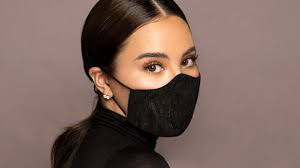

In [5]:
Image.open(os.path.join(img_dir_train, 'facemasked', 'images120.jpg'))

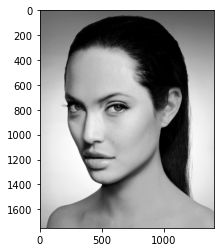

In [6]:
#img_name = 'image21.jpeg'
#img_name = 'image50.jpeg'
img_name = 'Angelina-Jolie-100x130cm-2013.jpg'
img2 = cv2.imread(os.path.join(img_dir_train, 'no_facemask', img_name))
plt.imshow(img2)
plt.show()

### Review people with no facemask face

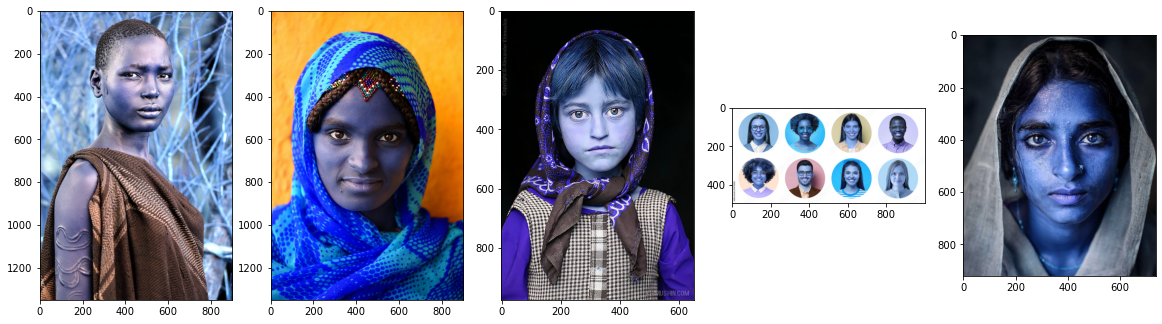

In [180]:
#ax, fig = plt.subplots(ncols=3, figsize=(20,20))
fig, ax = plt.subplots(ncols=5, figsize=(20,10))
for idx, img in enumerate(os.listdir(os.path.join(img_dir_train, 'no_facemask'))): 
    if idx == 5: break
    else :
        lst_img = cv2.imread(os.path.join(img_dir_train, 'no_facemask', img))
        ax[idx].imshow(lst_img)
        #ax[idx].imshow(cv2.cvtColor(lst_img, cv2.COLOR_BGR2RGB))        

### Review people that use facemask 

04150120-face-mask-sensitive-skin-skincare-tips_cover_1500x1000.jpg
1000_F_343810975_lVPL4TsJDZqWxbalwoVvifeSMaw8tkgU.jpg
1140-should-older-people-use-face-mask.jpg
13Lynteris4-videoSixteenByNineJumbo1600.jpg
200406145311-coronavirus-mask-new-york-0322.jpg
3446215-portrait-of-a-man-wearing-a-surgical-mask-medical-photocase-stock-photo-large.jpeg


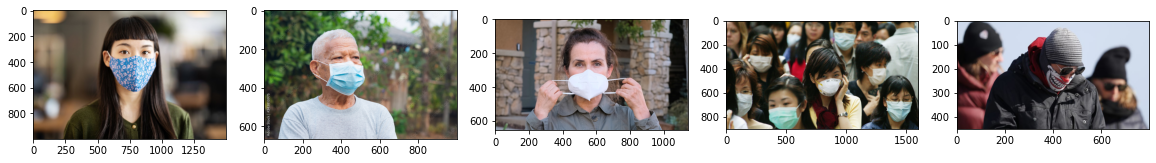

In [10]:
fig, ax = plt.subplots(ncols=5, figsize=(20,10))
for idx, img in enumerate(os.listdir(os.path.join(img_dir_train,'facemasked'))): 
    print(img)
    if idx == 5: break
    else :
        lst_img = cv2.imread(os.path.join(img_dir_train,'facemasked', img))        
        ax[idx].imshow(cv2.cvtColor(lst_img, cv2.COLOR_BGR2RGB))


## PART 2: Data Preprocessing

### Remove dodgy image

In [12]:
for image_class in os.listdir(img_dir_train): 
    if '.' in image_class:
        continue
    for image in os.listdir(os.path.join(img_dir_train, image_class)):
        image_path = os.path.join(img_dir_train, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

### Preprocess the training dataset

In [179]:
train_img_gen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2,
        vertical_flip=True,
)

train_generator = train_img_gen.flow_from_directory(
        img_dir_train,
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary'
)

Found 945 images belonging to 2 classes.


### Preprocess the test dataset

In [89]:
test_img_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_img_gen.flow_from_directory(
        img_dir_test,
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 200 images belonging to 2 classes.


## PART 3: Build the CNN

` Step 1: Initialize the cnn`

In [93]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,MaxPooling2D, Conv2D, Flatten

In [94]:
cnn = tf.Sequential()

` Step 2: Create First layer `
 (Convolutional, activation, input_shape)

In [95]:
cnn.add(Conv2D(filters=16, kernel_size=3, strides=2, activation='relu',input_shape=(64, 64, 3)))
cnn.add(MaxPooling2D(pool_size=(2, 2), strides=2))

`Step 3: Add multi-perceptron Layer`

In [96]:
cnn.add(Conv2D(16, (3,3), 1, activation='relu', ))
cnn.add(MaxPooling2D())
#cnn.add(Conv2D(16, (3,3), 1, activation='relu', ))
#cnn.add(MaxPooling2D())

` Step 4: Flattening`

In [97]:
cnn.add(Flatten())
cnn.output_shape

(None, 576)

` Step 5: Full Connection $ Output Layer`

In [98]:
cnn.add(Dense(128, activation='relu'))  # Full connection
cnn.add(Dense(1, activation='sigmoid')) # Output Layer

## Part 4: Training the CNN

In [99]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 31, 31, 16)        448       
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 15, 15, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 13, 13, 16)        2320      
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 6, 6, 16)          0         
 ng2D)                                                           
                                                                 
 flatten_4 (Flatten)         (None, 576)               0         
                                                                 
 dense_4 (Dense)             (None, 128)             

In [100]:
%%timeit -n1 -r1
cnn.fit(x=train_generator, validation_data=test_generator, epochs=30)

Epoch 1/30
30/30 [==============================] - 10s 286ms/step - loss: 0.6926 - accuracy: 0.5270 - val_loss: 0.6831 - val_accuracy: 0.5550
Epoch 2/30
30/30 [==============================] - 9s 284ms/step - loss: 0.6340 - accuracy: 0.6519 - val_loss: 0.6410 - val_accuracy: 0.6200
Epoch 3/30
30/30 [==============================] - 9s 299ms/step - loss: 0.5919 - accuracy: 0.6804 - val_loss: 0.6078 - val_accuracy: 0.6750
Epoch 4/30
30/30 [==============================] - 9s 283ms/step - loss: 0.5695 - accuracy: 0.7185 - val_loss: 0.5673 - val_accuracy: 0.7350
Epoch 5/30
30/30 [==============================] - 9s 295ms/step - loss: 0.5486 - accuracy: 0.7016 - val_loss: 0.5485 - val_accuracy: 0.7450
Epoch 6/30
30/30 [==============================] - 9s 312ms/step - loss: 0.5537 - accuracy: 0.7058 - val_loss: 0.5551 - val_accuracy: 0.7150
Epoch 7/30
30/30 [==============================] - 9s 301ms/step - loss: 0.5259 - accuracy: 0.7418 - val_loss: 0.5603 - val_accuracy: 0.7000
Epoch

## Part 5 - Making a single prediction

In [181]:
from tensorflow.keras.preprocessing import image

In [207]:
#Mask
pred_img ='mask 1.jpg'
#pred_img ='mask 2.jpg'
#pred_img = 'mask 3.jpg'
#pred_img ='mask 4.jpg'
#pred_img ='images (1).jpg'
pred_img ='images.jpg'
pred_img ='images.png'
#pred_img ='download.jpg'

#No-Mask
#pred_img ='mypic.jpg'
#pred_img ='boss.jpg'
pred_img = 'two face color b.png'
#pred_img ='mypic3.jpg'
#pred_img ='passport_small.jpg'
#pred_img ='IMG_0076.jpg'



test_image = image.load_img(os.path.join(img_base_dir,pred_img), target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 31ms/step


In [208]:
train_generator.class_indices
print(result)
if result [0][0] == 0:
    prediction = 'facemask'
else:
    prediction = 'nofcemask'
print(prediction    )


[[0.]]
facemask


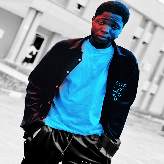

In [209]:
image.load_img(os.path.join(img_base_dir,pred_img),  target_size=(164, 164))